Presentation Zoom link:
https://drive.google.com/file/d/1n2O8OPSsp8EUpum3f81ijPkxwDtWWYPz/view?usp=sharing

#### Project Group: PERFECT SQUARES

#### Team Member: JAI SAXENA, PANKAJ BALCHANDANI, DURGESH MISHRA, NIRANJAN SOLANKI

# **Named Entity Recognition (NER)**

# **Motivation** 

Named entity recognition (NER)is probably the first step towards information extraction 
that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, 
organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many 
fields in Natural Language Processing (NLP), and it can help answering many real-world questions, such as:

Which companies were mentioned in the news article?
Were specified products mentioned in complaints or reviews?
Does the tweet contain the name of a person? Does the tweet contain this person’s location?



# ***How is NER used?***


NER is suitable for any situation where a high-level overview of large amounts of text is useful. With NER, you can understand the subject or topic of a text at a glance and quickly group texts based on their relevance or similarity.

Some notable use cases of NER include:

1.Human Resources: *italicised text*
Speed ​​up the hiring process by summarizing applicant resumes; improve internal work processes by categorizing employee complaints and queries

2.*Customer support:*
Improve response time by categorizing user requests, complaints and questions and filtering by priority keywords

3.*Search and recommendation tools:*
Improve the speed and relevance of search results and recommendations by summarizing descriptive text, reviews and discussions
Booking.com is a notable success story here

4.Content classification:*italicised text*
Easier to display content and gain insight into trends by identifying the topics and themes of blog posts and news articles
Health care

4.Improve standards of patient care and reduce workload by extracting essential information from laboratory reports
Roche does this using pathology and radiology reports

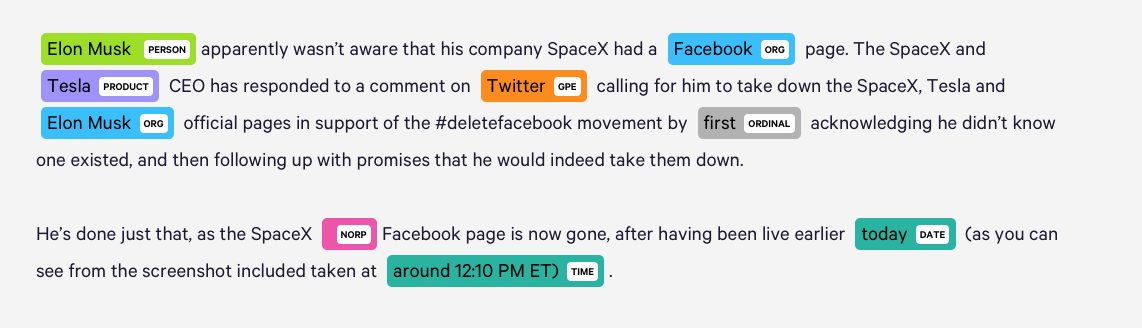

### Dataset Description
Datasets from the NASA Astrophysical Data System that contain text snippets from astrophysics articles that have been carefully labelled with astronomical facilities and other entities of interest (e.g., celestial objects).
The JSON Lines format is used for data sets (each line is a json dictionary).
The datasets follow the CONLL2003 formatting guidelines. Each token has a NER tag attached to it. The tags follow to the IOB2 syntax's "B-" and "I-" conventions.

Link: https://huggingface.co/datasets/fgrezes/WIESP2022-NER

Each entry consists of a dictionary with the following keys:

* "unique_id": a unique identifier for this data sample. Must be included in the predictions.
* "tokens": the list of tokens (strings) that form the text of this sample. Must be included in the predictions.
* "ner_tags": the list of NER tags (in IOB2 format)
The following keys are not strictly needed by the participants:

* "ner_ids": the pre-computed list of ids corresponding ner_tags, as given by the dictionary in ner_tags.json
* "label_studio_id", "section", "bibcode": references for internal NASA/ADS use.



The Dataset Contains:

1. 1753 Training examples
2. 63 different labels 
3. 1366 samples Wthout the NER Tags




## **OBJECTIVE:**

1. create a NER with high accuracy.
2. Try different models and extract entities from a sentence using the model that gives highest accuracy and name their classes. 


In [ ]:
import json
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import Input,Sequential
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense, TimeDistributed, SimpleRNN
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp /gdrive/MyDrive/AI3/WIESP2022-NER-VALIDATION-NO-LABELS.jsonl WIESP2022-NER-VALIDATION-NO-LABELS.jsonl
!cp /gdrive/MyDrive/AI3/WIESP2022-NER-TRAINING.jsonl WIESP2022-NER-TRAINING.jsonl
!cp /gdrive/MyDrive/AI3/WIESP2022-NER-DEV.jsonl WIESP2022-NER-DEV.jsonl
!cp /gdrive/MyDrive/AI3/WIESP2022-NER-DEV-sample-predictions.jsonl WIESP2022-NER-DEV-sample-predictions.jsonl

cp: cannot stat '/gdrive/MyDrive/AI3/WIESP2022-NER-VALIDATION-NO-LABELS.jsonl': No such file or directory
cp: cannot stat '/gdrive/MyDrive/AI3/WIESP2022-NER-TRAINING.jsonl': No such file or directory
cp: cannot stat '/gdrive/MyDrive/AI3/WIESP2022-NER-DEV.jsonl': No such file or directory
cp: cannot stat '/gdrive/MyDrive/AI3/WIESP2022-NER-DEV-sample-predictions.jsonl': No such file or directory


In [ ]:
!pip install simpletransformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#loading the Dataset
with open("/content/drive/MyDrive/Dataset/language_modeling/NER/WIESP2022-NER-TRAINING.jsonl", 'r') as f:
    wiesp_dev_json = [json.loads(l) for l in list(f)]
len(wiesp_dev_json)

1753

In [ ]:
with open("/content/drive/MyDrive/Dataset/language_modeling/NER/WIESP2022-NER-VALIDATION-NO-LABELS.jsonl", 'r') as f:
    wiesp_dev_json_val = [json.loads(l) for l in list(f)]
len(wiesp_dev_json_val)

1366

In [ ]:
# Checking the Frequency of each tag 
labels = []
for i in wiesp_dev_json:
  labels+=i['ner_tags']

unique, count = np.unique(labels, return_counts=True)
idx = np.argsort(count)
count = count[idx][:-1][::-1]
unique = unique[idx][:-1][::-1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


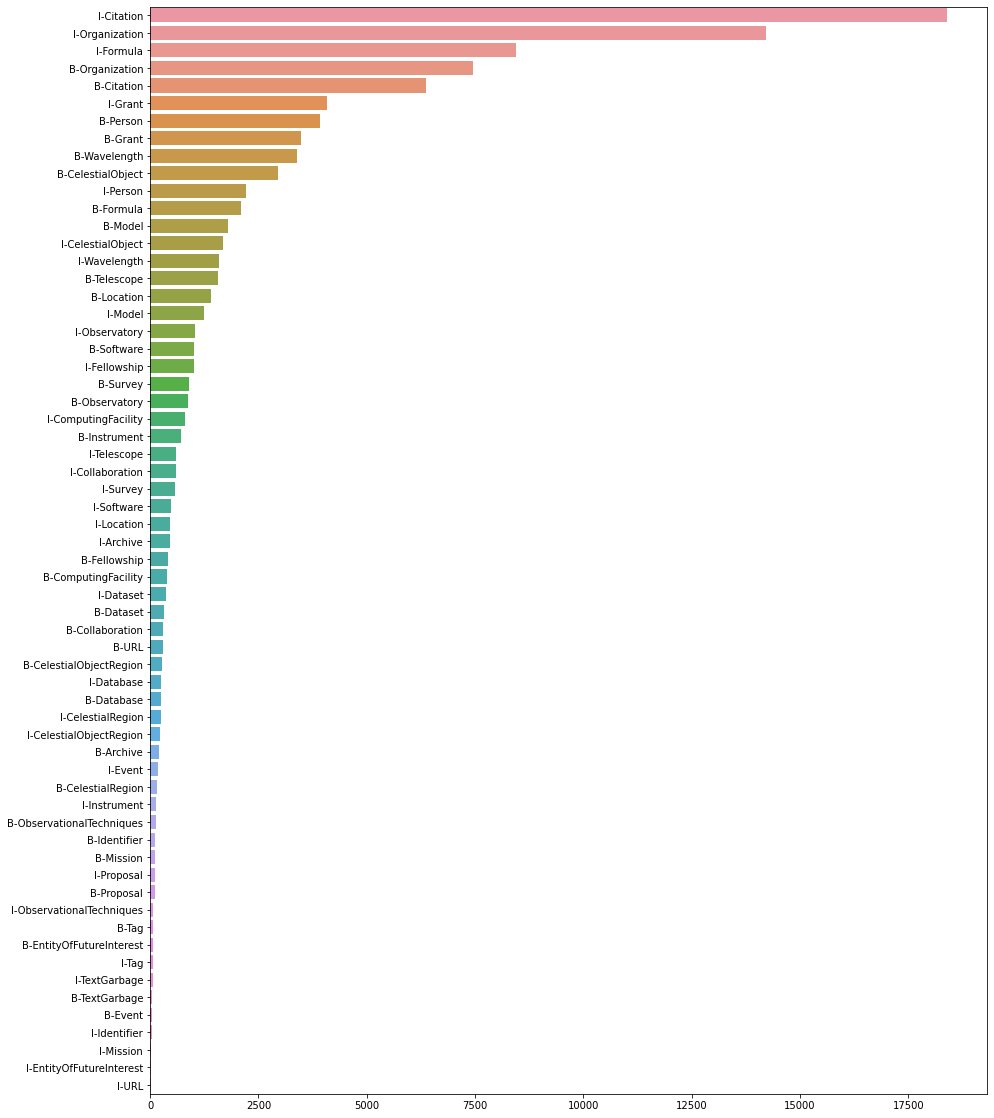

In [ ]:
# Count plot for ner tags in train dataset
plt.figure(figsize=(15,20))
sns.barplot(count, unique, orient = 'h');

In [ ]:
# Calling DataFrame constructor on list
df_train = pd.DataFrame(wiesp_dev_json)
print('Training Data shape: ', df_train.shape)
df_train.head()

Training Data shape:  (1753, 7)


,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...",fulltext,"[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,2018MNRAS.478.5533F,1129,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,2018MNRAS.480.3062L,1086,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,2016MNRAS.457.1786M,1135,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...",acknowledgments,"[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,2019MNRAS.482L...9B,559,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...",acknowledgments,"[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


In [ ]:
list(df_train.columns)

['bibcode',
 'label_studio_id',
 'ner_ids',
 'ner_tags',
 'section',
 'tokens',
 'unique_id']

# Data Preprocessing

In [ ]:
# Mapping tags to ids
l1 = []
for i in wiesp_dev_json:
  l1.extend(i['ner_tags'])
y_labels = list(set(l1))

y_labels = sorted(y_labels)
y_dict={j:i for i,j in enumerate(y_labels)} 
y_dict

{'B-Archive': 0,
 'B-CelestialObject': 1,
 'B-CelestialObjectRegion': 2,
 'B-CelestialRegion': 3,
 'B-Citation': 4,
 'B-Collaboration': 5,
 'B-ComputingFacility': 6,
 'B-Database': 7,
 'B-Dataset': 8,
 'B-EntityOfFutureInterest': 9,
 'B-Event': 10,
 'B-Fellowship': 11,
 'B-Formula': 12,
 'B-Grant': 13,
 'B-Identifier': 14,
 'B-Instrument': 15,
 'B-Location': 16,
 'B-Mission': 17,
 'B-Model': 18,
 'B-ObservationalTechniques': 19,
 'B-Observatory': 20,
 'B-Organization': 21,
 'B-Person': 22,
 'B-Proposal': 23,
 'B-Software': 24,
 'B-Survey': 25,
 'B-Tag': 26,
 'B-Telescope': 27,
 'B-TextGarbage': 28,
 'B-URL': 29,
 'B-Wavelength': 30,
 'I-Archive': 31,
 'I-CelestialObject': 32,
 'I-CelestialObjectRegion': 33,
 'I-CelestialRegion': 34,
 'I-Citation': 35,
 'I-Collaboration': 36,
 'I-ComputingFacility': 37,
 'I-Database': 38,
 'I-Dataset': 39,
 'I-EntityOfFutureInterest': 40,
 'I-Event': 41,
 'I-Fellowship': 42,
 'I-Formula': 43,
 'I-Grant': 44,
 'I-Identifier': 45,
 'I-Instrument': 46,
 'I

In [ ]:
# Reverse Dictionary 
dic_rev = {j:i for i,j in y_dict.items()}

In [ ]:
id2label =  {i:key[0] for i, key in enumerate(y_dict)}
for i in range(len(list(y_dict.keys()))):
  id2label[i] = list(y_dict.keys())[i]

In [ ]:
#extracting tokens from the dataset  
a= []
token_data = []
token_data2 = []
label_data = []
for i in wiesp_dev_json:
  a.append(len(i['tokens']))

for i in wiesp_dev_json:
  token_data.extend(i['tokens'])
  token_data1 =[]
  label_data1 = []
  for j in range(len(i['tokens'])):
    if i['tokens'][j] in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n':
      continue
    else:
      token_data1.append(i['tokens'][j])
      label_data1.append(i['ner_tags'][j])
  token_data2.append(token_data1)
  label_data.append(label_data1)


print('Minimum and maximum lenght of sentence' ,min(a),',',max(a))

Minimum and maximum lenght of sentence 7 , 795


In [ ]:
#Tokenizing using tf.keras.preprocessing.text.Tokenizer
n_words = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(token_data)

In [ ]:
#Creating sequences 
seq = tokenizer.texts_to_sequences(token_data2)

In [ ]:
rev = { tokenizer.word_index[i]:i for i in tokenizer.word_index}
# Reverse Dictionary to id2word 

In [ ]:
len(seq[0]), len(token_data2[0])
new_y1 = []
new_x1 = []
for i in range(len(seq)):
  tok=[]
  new_x=[]
  new_y=[]
  for j in seq[i]:
    tok.append(rev[j])
  count=0
  for t in range(len(token_data2[i])):
    if count < len(tok) and token_data2[i][t].lower() == tok[count] :
        new_y.append(y_dict[label_data[i][t]])
        new_x.append(token_data2[i][t])
        count+=1
  new_x1.append(new_x)
  new_y1.append(new_y)
len(new_x),len(new_y)

(380, 380)

In [ ]:
vocabulary_size = 5000
# Max word length for each review will be 800
max_words = 800
# we set the embedding size to 32
embedding_size=100
# output dimension will be the the number of labels present 
output_units = len(y_labels)
# Pre-padding sequences to max_words lenth
X_train = sequence.pad_sequences(seq, maxlen=max_words,padding='pre')

In [ ]:
#creating a Y for every X
y_train= []
for i in range(len(seq)):
  yy = np.array([62]*(X_train[i][X_train[i] == 0].shape[0]) + new_y1[i])
  y_train.append(yy)
y_train = np.array(y_train)

In [ ]:
#splitting our data into X train and Y train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.1)
print("shape of X_train is:",X_train.shape)
print("shape of X_test is:",X_test.shape)
print("shape of y_train is:",y_train.shape)
print("shape of y_test is:",y_test.shape)

shape of X_train is: (1577, 800)
shape of X_test is: (176, 800)
shape of y_train is: (1577, 800)
shape of y_test is: (176, 800)


# Vanilla RNN

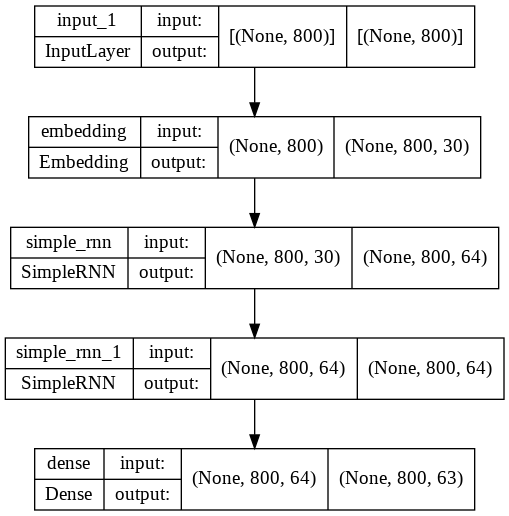

In [ ]:
# Clear the tensorflow session
tf.keras.backend.clear_session()

# Defining the input layer
input_layer = Input(shape=(800,))

# Adding a embedding layer
word_emb = Embedding(vocabulary_size, 30)(input_layer)

# Adding a RNN layer
rnn_layer1 = SimpleRNN(64, return_sequences=True)(word_emb)

# Adding a RNN layer
rnn_layer2 = SimpleRNN(64, return_sequences=True)(rnn_layer1)

# Defining the output layer with 30 nodes and softmax activation
output_layer = Dense(63, activation='softmax')(rnn_layer2)

# Combining the input and output to form the language model
model = Model(inputs = input_layer, outputs = output_layer)

tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile the model
model.compile(optimizer= 'adam', loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

# Using callback in keras
callback = tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=[callback], verbose=1)

Epoch 1/20
40/40 [==============================] - 65s 1s/step - loss: 1.0583 - accuracy: 0.8671 - val_loss: 0.3091 - val_accuracy: 0.9632
Epoch 2/20
40/40 [==============================] - 56s 1s/step - loss: 0.2988 - accuracy: 0.9620 - val_loss: 0.2863 - val_accuracy: 0.9632
Epoch 3/20
40/40 [==============================] - 55s 1s/step - loss: 0.2871 - accuracy: 0.9620 - val_loss: 0.2808 - val_accuracy: 0.9632
Epoch 4/20
40/40 [==============================] - 55s 1s/step - loss: 0.2830 - accuracy: 0.9620 - val_loss: 0.2784 - val_accuracy: 0.9632
Epoch 5/20
40/40 [==============================] - 55s 1s/step - loss: 0.2806 - accuracy: 0.9620 - val_loss: 0.2754 - val_accuracy: 0.9632
Epoch 6/20
40/40 [==============================] - 55s 1s/step - loss: 0.2781 - accuracy: 0.9620 - val_loss: 0.2731 - val_accuracy: 0.9632
Epoch 7/20
40/40 [==============================] - 55s 1s/step - loss: 0.2738 - accuracy: 0.9620 - val_loss: 0.2651 - val_accuracy: 0.9632
Epoch 8/20
40/40 [==

In [ ]:
model.save('/content/drive/MyDrive/Dataset/language_modeling/NER/model/simplernn.h5')

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/Dataset/language_modeling/NER/model/simplernn.h5')

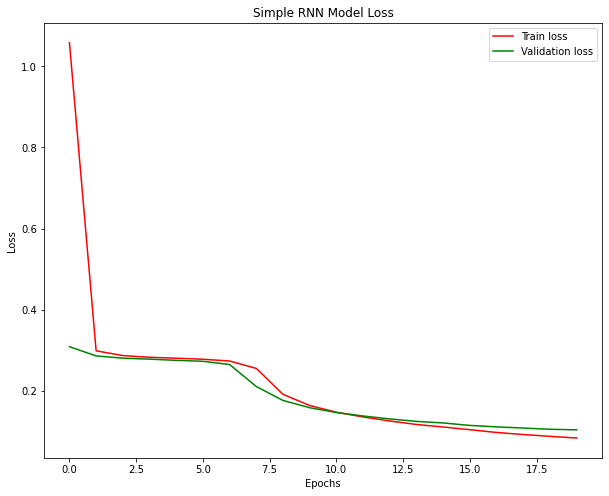

In [ ]:
# Ploting the train and validation loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Simple RNN Model Loss")
plt.plot(history.history['loss'], label='Train loss', color='red')
plt.plot(history.history['val_loss'],  label='Validation loss', color='green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

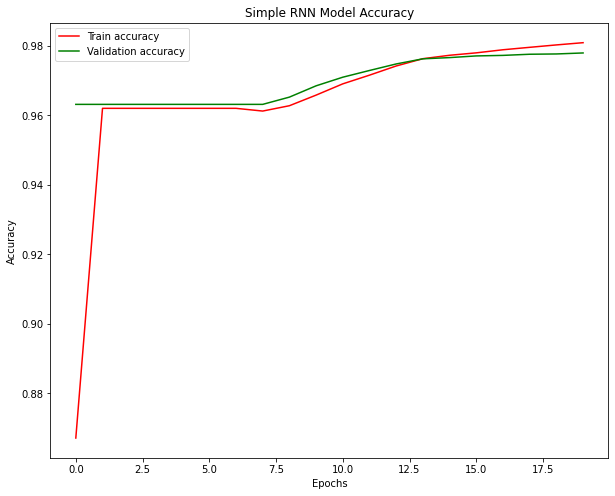

In [ ]:
# Ploting the train and validation accuracy of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Simple RNN Model Accuracy")
plt.plot(history.history['accuracy'], label='Train accuracy', color='red')
plt.plot(history.history['val_accuracy'],  label='Validation accuracy', color='green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluating our model
score = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred = np.argmax(np.array(y_pred), axis=-1)

6/6 [==============================] - 1s 113ms/step - loss: 0.1128 - accuracy: 0.9762


In [ ]:
# Mapping our predictions from X test to that of y test and checking whether our predictions were correct
for i in range(2):
  y_pred = model.predict(np.array([X_test[i]]))
  pred = np.argmax(np.array(y_pred), axis=-1)

  print("Original  : ",[*map(id2label.get, y_test[i])])
  print("predicted : ",[*map(id2label.get, pred[0])])
  print("----------------------------------------------------------------------------------------------------")

Original  :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

We got a 97.6 % accuracy for our baseline model. 
As we can see most of our predicted match the original tags present in Y_test 

## LSTM



In [ ]:

n_words = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=n_words)
tokenizer.fit_on_texts(token_data)

In [ ]:
#Creating our LSTM model architecture
input_layer = Input(shape =max_words,)
embeddings = Embedding(vocabulary_size,embedding_size,name = "embedding")(input_layer)
lstm1 = LSTM(embedding_size,return_sequences = True)(embeddings)
lstm2 = LSTM(embedding_size,return_sequences=True)(lstm1)
output = Dense(units = output_units,activation = 'softmax')(lstm2)
model = Model(inputs= input_layer,outputs = output)

In [ ]:
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics = 'acc')

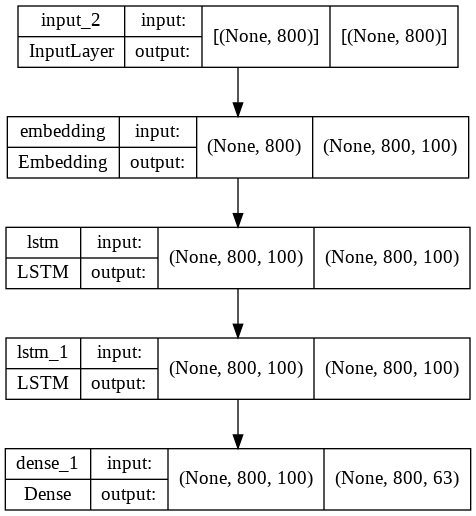

In [ ]:
plot_model(model,show_shapes = True)

In [ ]:
history = model.fit(X_train,y_train,epochs = 30 ,validation_split= 0.2)

Epoch 1/30
40/40 [==============================] - 10s 90ms/step - loss: 0.6361 - acc: 0.9379 - val_loss: 0.2716 - val_acc: 0.9626
Epoch 2/30
40/40 [==============================] - 3s 68ms/step - loss: 0.2381 - acc: 0.9619 - val_loss: 0.2064 - val_acc: 0.9633
Epoch 3/30
40/40 [==============================] - 3s 68ms/step - loss: 0.1915 - acc: 0.9623 - val_loss: 0.1725 - val_acc: 0.9639
Epoch 4/30
40/40 [==============================] - 3s 69ms/step - loss: 0.1513 - acc: 0.9674 - val_loss: 0.1392 - val_acc: 0.9708
Epoch 5/30
40/40 [==============================] - 3s 68ms/step - loss: 0.1273 - acc: 0.9721 - val_loss: 0.1279 - val_acc: 0.9732
Epoch 6/30
40/40 [==============================] - 3s 69ms/step - loss: 0.1124 - acc: 0.9748 - val_loss: 0.1158 - val_acc: 0.9745
Epoch 7/30
40/40 [==============================] - 3s 69ms/step - loss: 0.1069 - acc: 0.9757 - val_loss: 0.1095 - val_acc: 0.9758
Epoch 8/30
40/40 [==============================] - 3s 68ms/step - loss: 0.0993 - 

In [ ]:
#Saving our model
model.save('model.h5')

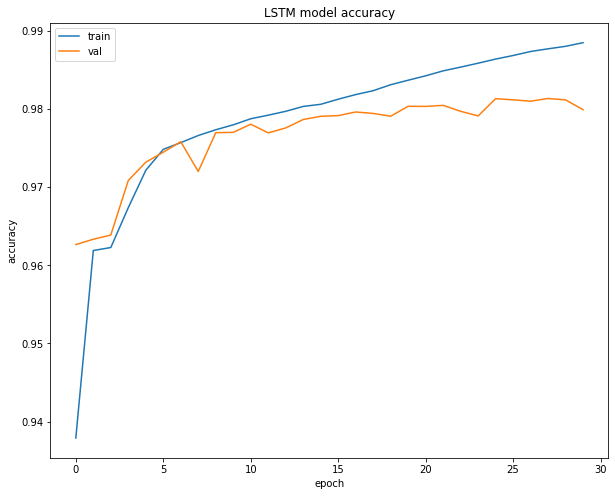

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

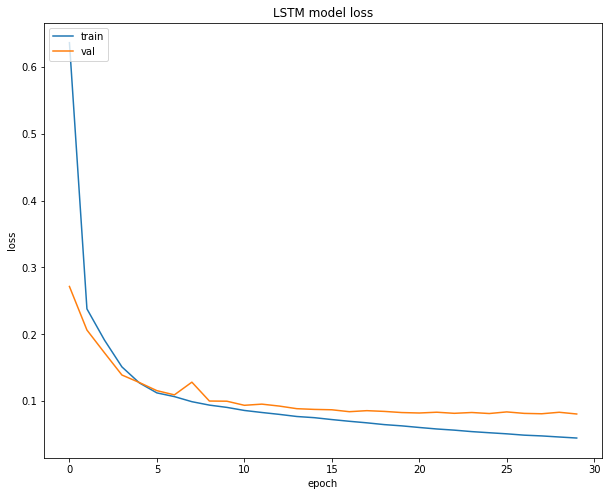

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Evaluating our model
score = model.evaluate(X_test,y_test)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100 , '%')

6/6 [==============================] - 0s 48ms/step - loss: 0.0897 - acc: 0.9781
Test loss: 0.08971516788005829
Test accuracy: 97.80895113945007 %


In [ ]:
for i in range(1):
  y_pred = model.predict(np.array([X_test[i]]))
  pred = np.argmax(np.array(y_pred), axis=-1)

  print("Original  : ",[*map(id2label.get, y_test[i])])
  print("predicted : ",[*map(id2label.get, pred[0])])
  print("----------------------------------------------------------------------------------------------------")

Original  :  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [ ]:
model.save('/content/drive/MyDrive/Dataset/language_modeling/NER/model/lstm.h5')

In [ ]:
# Evaluating Our results 
y_val_pred = model.predict(X_test)
y_val_pred = np.argmax(np.array(y_val_pred), axis=-1)
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(np.array(y_train_pred), axis=-1)

In [ ]:
labels = []

for i in wiesp_dev_json:
  labels+=i['ner_ids']

unique, count = np.unique(labels, return_counts=True)

idx = np.argsort(count)
count = count[idx][:-1][::-1]
unique = unique[idx][:-1][::-1]

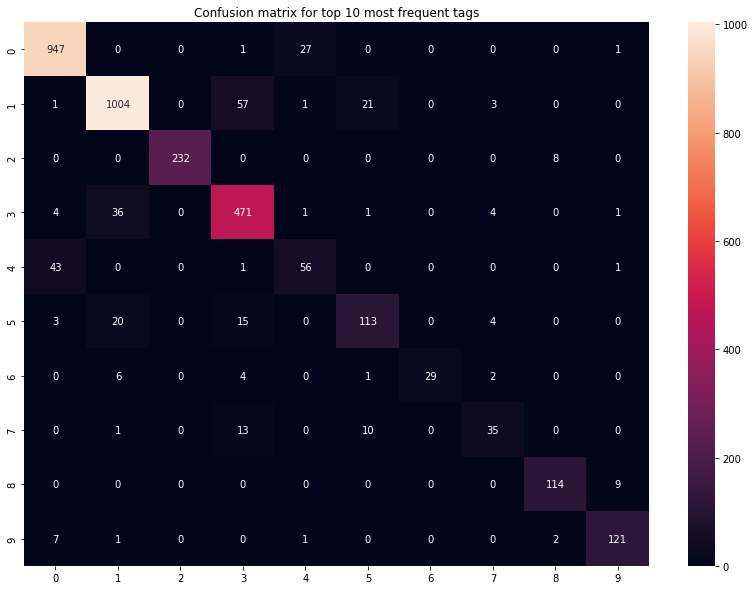

In [ ]:
# Creating a Confusion Matrix to check our results
cm = confusion_matrix(y_test.reshape(-1,1), y_val_pred.reshape(-1,1), labels=list(unique[:10]))

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.title('Confusion matrix for top 10 most frequent tags')
plt.show()

In [ ]:
y_train_ = y_train.reshape(-1,1)
y_train_pred_ = y_train_pred.reshape(-1,1)
y_val_ = y_test.reshape(-1,1) 
y_val_pred = y_val_pred.reshape(-1,1)


accuracy_train = accuracy_score(y_train_, y_train_pred_)
accuracy_val = accuracy_score(y_val_, y_val_pred)
recall_train = recall_score(y_train_, y_train_pred_, average = 'weighted')
recall_val = recall_score(y_val_, y_val_pred, average = 'weighted')
precision_train = precision_score(y_train_, y_train_pred_, average = 'weighted')
precision_val = precision_score(y_val_, y_val_pred, average = 'weighted')
f1_score_train = f1_score(y_train_, y_train_pred_, average = 'weighted')
f1_score_val = f1_score(y_val_, y_val_pred, average = 'weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from prettytable import PrettyTable
  
myTable = PrettyTable(["Data", "Metric", "Score"])
  
myTable.add_row(["Train", "Accuracy", 100*np.round(accuracy_train,2)])
myTable.add_row(["Val", "Accuracy", 100*np.round(accuracy_val,2)])
myTable.add_row(["Train", "Recall", 100*np.round(recall_train,2)])
myTable.add_row(["Val", "Recall", 100*np.round(recall_val,2)])
myTable.add_row(["Train", "Precision", 100*np.round(accuracy_train,2)])
myTable.add_row(["Val", "Precision", 100*np.round(accuracy_val,2)])
myTable.add_row(["Train", "F1 score", 100*np.round(accuracy_train,2)])
myTable.add_row(["Val", "F1 score", 100*np.round(accuracy_val,2)])
  
print(myTable)

+-------+-----------+-------+
|  Data |   Metric  | Score |
+-------+-----------+-------+
| Train |  Accuracy |  99.0 |
|  Val  |  Accuracy |  98.0 |
| Train |   Recall  |  99.0 |
|  Val  |   Recall  |  98.0 |
| Train | Precision |  99.0 |
|  Val  | Precision |  98.0 |
| Train |  F1 score |  99.0 |
|  Val  |  F1 score |  98.0 |
+-------+-----------+-------+


## Bert NER

In [ ]:
# importing the bert libraries
from simpletransformers.ner import NERModel, NERArgs 

In [ ]:

train_dataset = dict()

sentence = []
tags = []
words = []

for idx, i in enumerate(wiesp_dev_json):

  for j in range(len(i['tokens'])):
    words.append(i['tokens'][j])
    tags.append(i['ner_tags'][j])
    sentence.append(idx+1)

train_dataset = {'sentence_id':sentence, 'words':words, 'labels':tags}

len(train_dataset)

3

In [ ]:
df = pd.DataFrame(train_dataset)
df.head()

,sentence_id,words,labels
0,1,Whilst,O
1,1,a,O
2,1,reasonable,O
3,1,harmonic,O
4,1,fit,O


In [ ]:
df['sentence_id'].max()

1753

In [ ]:
df['words'] = df['words'].apply(lambda x: x.strip().lower())

In [ ]:
index = df.index

train_index, val_index = train_test_split(index, test_size=0.2, random_state=1)

training_dataset = df.loc[train_index]
validation_dataset = df.loc[val_index]

In [ ]:
args = NERArgs()
args.num_train_epochs = 10
args.learning_rate=0.0001
args.overwrite_output_dir = True
args.train_batch_size=32
args.eval_batch_size=32

In [ ]:
labels = list(np.unique(df['labels']))

model = NERModel('bert', 'bert-base-uncased', labels=labels, args=args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [ ]:
model.train_model(train_data = training_dataset, eval_data = validation_dataset, acc = accuracy_score)

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/55 [00:00<?, ?it/s]

(550, 0.38988249854608015)

In [ ]:
metrics, y_pred, pred_list = model.eval_model(validation_dataset)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
true = []
pred = []

for i in wiesp_dev_json:
  sentence = i['tokens']
  true+=i['ner_tags']
  prediction = model.predict(sentence)[0]
  pp = []
  for j in prediction:
    pp.append(list(j[0].values())[0])
  pred+=pp

In [ ]:
import torch 

torch.save(model, '/gdrive/MyDrive/AI3/Weights/my.h5')

In [ ]:
labels = []

for i in wiesp_dev_json:
  labels+=i['ner_tags']

unique, count = np.unique(labels, return_counts=True)

idx = np.argsort(count)
count = count[idx][:-1][::-1]
unique = unique[idx][:-1][::-1]

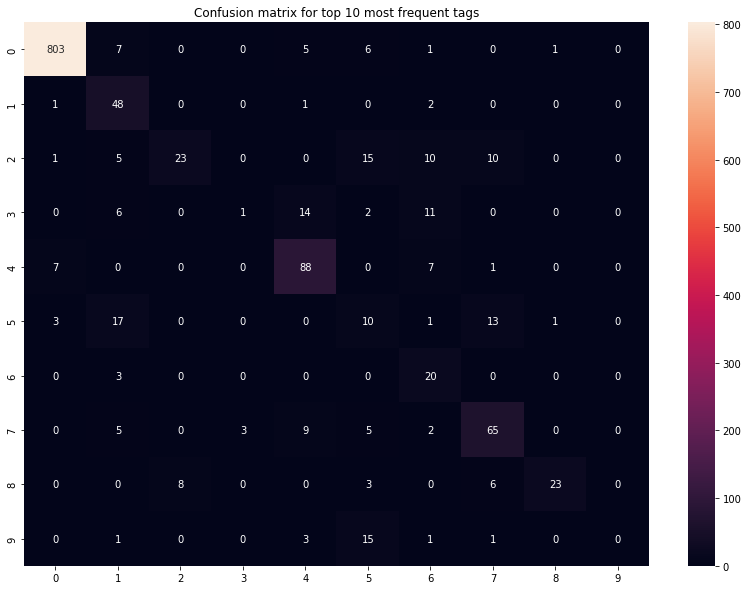

In [ ]:
cm = confusion_matrix(true, pred, labels=list(unique[:10]))

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.title('Confusion matrix for top 10 most frequent tags')
plt.show()

In [ ]:
y_val_ = np.array(true)
y_val_pred = np.array(pred)


accuracy_val = accuracy_score(y_val_, y_val_pred)
recall_val = recall_score(y_val_, y_val_pred, average = 'weighted')
precision_val = precision_score(y_val_, y_val_pred, average = 'weighted')
f1_score_val = f1_score(y_val_, y_val_pred, average = 'weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from prettytable import PrettyTable
  
myTable = PrettyTable(["Metric", "Score"])
  
myTable.add_row(["Accuracy", 100*np.round(accuracy_val,2)])
myTable.add_row(["Recall", 100*np.round(recall_val,2)])
myTable.add_row(["Precision", 100*np.round(accuracy_val,2)])
myTable.add_row(["F1 score", 100*np.round(accuracy_val,2)])
  
print(myTable)

+-----------+-------+
|   Metric  | Score |
+-----------+-------+
|  Accuracy |  83.0 |
|   Recall  |  83.0 |
| Precision |  83.0 |
|  F1 score |  83.0 |
+-----------+-------+


### Final prediction on LSTM model

In [ ]:
# calling our saved LSTM model which has given the maximum accuracy uptill now
# and predictingthe different tags present  
model = tf.keras.models.load_model('model.h5')
word_rev  = {j:i for i,j  in tokenizer.word_index.items()}

In [ ]:
# In order to predict and classify each word present in a sentence we have created a function wwhich will 
# help us map the words with their respective classes 

dic_rev = {j:i for i,j in y_dict.items()}
def name_Entity_Recog(str1):
  entities={}
  s = str1.split()
  l = []
  for j in s:
    j = j.strip()
    j = re.sub("[^0-9a-zA-Z]+",'', j)
    j = j.lower()
    l.append(j)
  t = tokenizer.texts_to_sequences(l)
  l1=[]
  for i in t:
     if len(i)>0:
       l1.append(i[0])
  test = sequence.pad_sequences([l1], maxlen=800,padding='pre')
  y1=[]
  y = model.predict(test)
  y = np.argmax(y[0],axis = 1)
  for i in y:
    y1.append(dic_rev[i])
  for i in range(len(y1[-len(l1):])):
    if y1[-len(l1):][i] !='O':
      entities[word_rev[l1[i]]] = y1[-len(l1):][i]
  return entities
  
  # print(j)
name_Entity_Recog(" ".join(wiesp_dev_json[2]['tokens']))

{'2018': 'B-Observatory',
 'agency': 'I-Organization',
 'analysis': 'I-Organization',
 'and': 'I-Organization',
 'astrophysics': 'I-ComputingFacility',
 'center': 'B-Organization',
 'computational': 'I-ComputingFacility',
 'consortium': 'I-Organization',
 'council': 'I-Organization',
 'data': 'I-Organization',
 'david': 'B-Person',
 'dpac': 'B-Organization',
 'dr2': 'I-Organization',
 'erc': 'B-Organization',
 'european': 'B-Organization',
 'for': 'I-ComputingFacility',
 'framework': 'I-Grant',
 'funding': 'I-Organization',
 'gaia': 'B-Organization',
 'in': 'I-Organization',
 'institute': 'B-Organization',
 'multilateral': 'I-Collaboration',
 'national': 'B-Organization',
 'of': 'I-ComputingFacility',
 'processing': 'I - Organization',
 'programme': 'I-Grant',
 'research': 'I-Organization',
 'seventh': 'I-Grant',
 'space': 'I-Organization',
 'workshop': 'I-Archive'}